In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./_info.csv')
df = df.dropna()
print('report count:', len(df),', family count:', df['Family'].unique())
df.head(3)

report count: 45 , family count: ['dofloo' 'xorddos' 'Darlloz' 'lupper' 'Gafgyt' 'Luabot' 'Kaiten' 'Turla']


,Family,DocId,Genre,Txtname,Source,Title,objN,objD,objSysN,objSysD,opN,opD,opSysN,opSysD,obj,objSys,op,opSys,numOfSTobj,numOfSTsys
0,dofloo,"D1,1",news,Dofloo-BleepingComputer,bleepingcomputer.com,Exposed Docker APIs Abused by DDoS,0.0,69.0,0.0,10.0,0.0,371.0,0.0,9.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,dofloo,"D1,2",news,Dofloo-Securityaffairs,securityaffairs.co,AESDDoS exploits CVE20193396 flaw,8.0,69.0,2.0,10.0,7.0,371.0,3.0,9.0,0.115942,0.2,0.018868,0.115942,4.0,2.0
2,dofloo,"D1,3",analysis,Dofloo-SyscallParty,blog.syscall.party,Analysing the new Linux_AES.DDoS IoT malware,9.0,69.0,2.0,10.0,64.0,371.0,3.0,9.0,0.130435,0.2,0.172507,0.130435,9.0,5.0


### Plot completeness of ASG object (Gamma-old) in CTI documents
- scale min-max object count into [0,1]

Text(0.5, 0, 'Number of document')

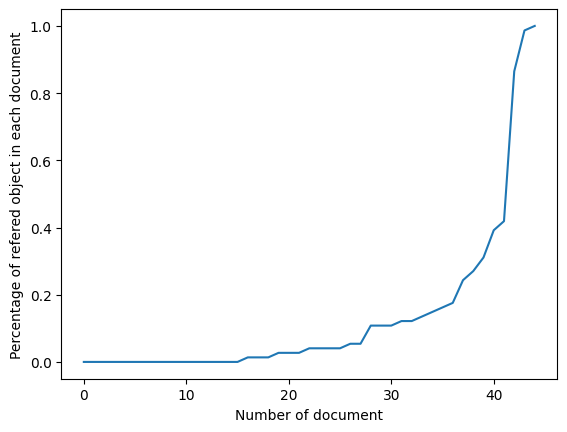

In [4]:
max = df['objN'].max()
min = df['objN'].min()

ioc_counts = df['objN']/max
ioc_counts = ioc_counts.sort_values()
ioc_counts = ioc_counts.to_list()

plt.plot(ioc_counts)
plt.ylabel("Percentage of refered ASG object in each document") # y label
plt.xlabel("Number of document") # x label

- 雙座標 (百分比和個數)
- 四分位數 (ing)

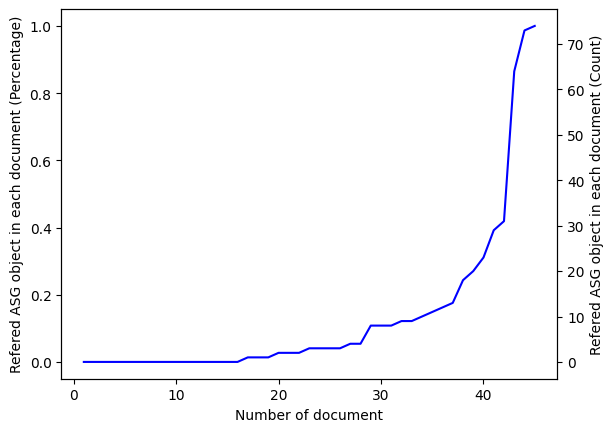

In [6]:
max = df['objN'].max()
min = df['objN'].min()

ioc_counts = df['objN']
ioc_percent = ioc_counts/max
ioc_percent = ioc_percent.sort_values()
ioc_percent = ioc_percent.to_list()
ioc_counts = sorted(ioc_counts.to_list())

x_data = list(range(1, len(ioc_percent)+1))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x_data, ioc_percent, 'w-') # hide the first line 兩條線畫起來趨勢一樣
ax2.plot(x_data, ioc_counts, 'b-')

ax1.set_xlabel('Number of document')
ax1.set_ylabel('Refered ASG object in each document (Percentage)', color='black')
ax2.set_ylabel('Refered ASG object in each document (Count)', color='black')

plt.show()

### Plot completeness of STobject (Gamma-new) in CTI documents

15
mean:9.84, q25:0.0, q75:3.0
max 5 ioc counts: [9.0, 15.0, 62.0, 136.0, 155.0]


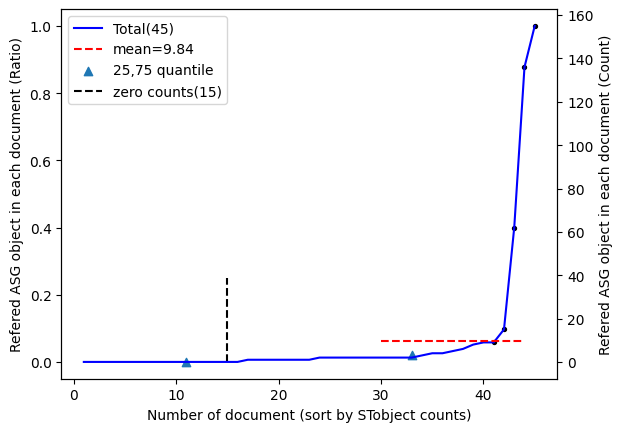

In [14]:
# https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot
# https://stackoverflow.com/questions/9834452/how-do-i-make-a-single-legend-for-many-subplots

def last_index_of(number:int, lst:list) -> int:
    ''' return index of last appearance of the number '''
    if number not in lst:
        return -1
    last_index = 0
    for i,v in enumerate(lst):
        if v == number:
            last_index = i
    return last_index

last_index_of(0, [0,0,0,0,1,2,3,4]) # 3
last_index_of(0, [0,0,0,1,2,0,3,4]) # 5

max = df['numOfSTobj'].max()
min = df['numOfSTobj'].min()
ioc_counts = df['numOfSTobj']
ioc_counts = sorted(ioc_counts.to_list())
ioc_percent = ioc_counts/max
x_data = list(range(1, len(ioc_percent)+1))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x_data, ioc_percent, 'w-') # hide the first line 兩條線畫起來趨勢一樣
ax2.plot(x_data, ioc_counts, 'b-', label=f'Total({len(ioc_counts)})')
ax1.set_xlabel('Number of document (sort by STobject counts)')
ax1.set_ylabel('Refered ASG object in each document (Ratio)', color='black')
ax2.set_ylabel('Refered ASG object in each document (Count)', color='black')

# 畫出最大的5個點
ax2.scatter(x_data[-5:], ioc_counts[-5:], marker='o', s=8, c='k')

# 畫出 ioc 數量=0個的刻度
zero = last_index_of(0, ioc_counts)
print(zero)

# 平均數, 25&75百分位數
mean_percent = np.mean(ioc_percent)
mean_count = np.mean(ioc_counts)
q25y, q75y = np.quantile(ioc_counts, np.array([0.25, 0.75]))
q25x, q75x = len(ioc_counts)//4, len(ioc_counts)*3//4
print(f"mean:{mean_count:.2f}, q25:{q25y}, q75:{q75y}")
print(f"max 5 ioc counts: {ioc_counts[-5:]}")

# plt.plot(ioc_counts, label=f'Total({len(ioc_counts)})')
ax1.vlines(x=zero, ymin=-0.00, ymax=0.25, colors='black', ls='--', label=f'zero counts({zero})')
ax2.hlines(y=mean_count, xmin=30, xmax=44, colors='r', ls='--', label=f'mean={mean_count:.2f}')
ax2.scatter([q25x, q75x], [q25y, q75y], marker='^', label='25,75 quantile')

handles, labels = [(a + b) for a, b in zip(ax2.get_legend_handles_labels(), ax1.get_legend_handles_labels())]
ax1.legend(handles, labels, loc='upper left')
# plt.legend() # Add legend

將其中3個類別獨立出來看 (campaign只有1篇先不畫)

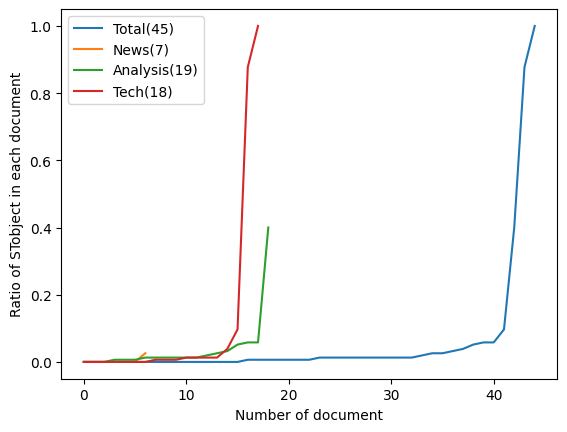

In [15]:
max = df['numOfSTobj'].max()
min = df['numOfSTobj'].min()

ioc_counts = df['numOfSTobj']/max
ioc_counts = ioc_counts.sort_values()
ioc_counts = ioc_counts.to_list()

df_news = df[df['Genre'] == 'news']
df_analysis = df[df['Genre'] == 'analysis']
df_tech = df[df['Genre'] == 'tech']
# campaign 只有一篇 Kaiten-trendmicro

ioc_news_cnt = df_news['numOfSTobj']/max
ioc_news_cnt = ioc_news_cnt.sort_values().to_list()

ioc_anal_cnt = df_analysis['numOfSTobj']/max
ioc_anal_cnt = ioc_anal_cnt.sort_values().to_list()

ioc_tech_cnt = df_tech['numOfSTobj']/max
ioc_tech_cnt = ioc_tech_cnt.sort_values().to_list()

plt.plot(ioc_counts, label=f'Total({len(ioc_counts)})')
plt.plot(ioc_news_cnt, label=f'News({len(ioc_news_cnt)})')
plt.plot(ioc_anal_cnt, label=f'Analysis({len(ioc_anal_cnt)})')
plt.plot(ioc_tech_cnt, label=f'Tech({len(ioc_tech_cnt)})')
plt.ylabel("Ratio of STobject in each document") # y label
plt.xlabel("Number of document") # x label
plt.legend() # Add legend

In [16]:
# 最多 IoC 的分別是: D3,4 D3,5 D2,4 D1,4 D1,3
df.sort_values(by=['numOfSTobj'], ascending=False).head(5)

,Family,DocId,Genre,Txtname,Source,Title,objN,objD,objSysN,objSysD,opN,opD,opSysN,opSysD,obj,objSys,op,opSys,numOfSTobj,numOfSTsys
14,Darlloz,"D3,4",tech,Darlloz-Trendmicro,trendmicro.com,UNIX_DARLLOZ.A,73.0,318.0,0.0,1.0,69.0,596.0,0.0,1.0,0.229560,0.000000,0.115772,0.229560,155.0,0.0
15,Darlloz,"D3,5",tech,Darlloz-Trendmicro2,trendmicro.com,Worm_Linux_DARLLOZ.AA,74.0,318.0,0.0,1.0,73.0,596.0,0.0,1.0,0.232704,0.000000,0.122483,0.232704,136.0,0.0
7,xorddos,"D2,4",analysis,Xorddos-Ms,microsoft.com,A deeper look at the stealthy DDoS malware ta...,29.0,815.0,13.0,14.0,963.0,7469.0,64.0,77.0,0.035583,0.928571,0.128933,0.035583,62.0,23.0
3,dofloo,"D1,4",tech,Dofloo-Trendmicro,trendmicro.com,Threat Encyclopedia,10.0,69.0,6.0,10.0,10.0,371.0,0.0,9.0,0.144928,0.600000,0.026954,0.144928,15.0,9.0
2,dofloo,"D1,3",analysis,Dofloo-SyscallParty,blog.syscall.party,Analysing the new Linux_AES.DDoS IoT malware,9.0,69.0,2.0,10.0,64.0,371.0,3.0,9.0,0.130435,0.200000,0.172507,0.130435,9.0,5.0


### Plot Phi 指標 (ASG steps)

26
mean:47.64, q25:0.0, q75:5.0
max 5 steps counts: [64.0, 69.0, 73.0, 901.0, 963.0]


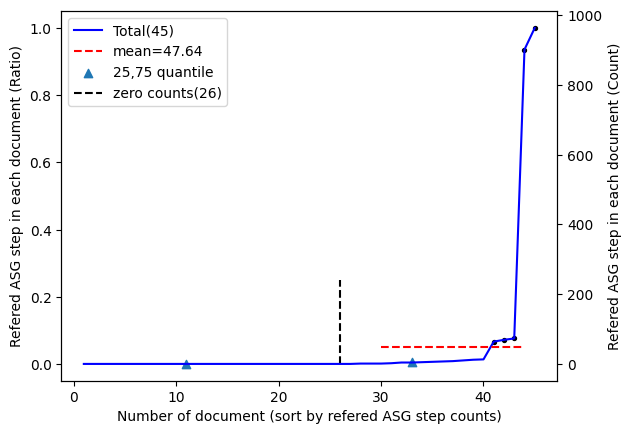

In [19]:
# https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot
# https://stackoverflow.com/questions/9834452/how-do-i-make-a-single-legend-for-many-subplots

ioc_counts = df['opN']
max = ioc_counts.max()
min = ioc_counts.min()
ioc_counts = sorted(ioc_counts.to_list())
ioc_percent = ioc_counts/max
x_data = list(range(1, len(ioc_percent)+1))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x_data, ioc_percent, 'w-') # hide the first line 兩條線畫起來趨勢一樣
ax2.plot(x_data, ioc_counts, 'b-', label=f'Total({len(ioc_counts)})')
ax1.set_xlabel('Number of document (sort by refered ASG step counts)')
ax1.set_ylabel('Refered ASG step in each document (Ratio)', color='black')
ax2.set_ylabel('Refered ASG step in each document (Count)', color='black')

# 畫出最大的5個點
ax2.scatter(x_data[-5:], ioc_counts[-5:], marker='o', s=8, c='k')

# 畫出 ioc 數量=0個的刻度
zero = last_index_of(0, ioc_counts)
print(zero)

# 平均數, 25&75百分位數
mean_percent = np.mean(ioc_percent)
mean_count = np.mean(ioc_counts)
q25y, q75y = np.quantile(ioc_counts, np.array([0.25, 0.75]))
q25x, q75x = len(ioc_counts)//4, len(ioc_counts)*3//4
print(f"mean:{mean_count:.2f}, q25:{q25y}, q75:{q75y}")
print(f"max 5 steps counts: {ioc_counts[-5:]}")

# plt.plot(ioc_counts, label=f'Total({len(ioc_counts)})')
ax1.vlines(x=zero, ymin=-0.00, ymax=0.25, colors='black', ls='--', label=f'zero counts({zero})')
ax2.hlines(y=mean_count, xmin=30, xmax=44, colors='r', ls='--', label=f'mean={mean_count:.2f}')
ax2.scatter([q25x, q75x], [q25y, q75y], marker='^', label='25,75 quantile')

handles, labels = [(a + b) for a, b in zip(ax2.get_legend_handles_labels(), ax1.get_legend_handles_labels())]
ax1.legend(handles, labels, loc='upper left')
# plt.legend() # Add legend

- 可以看到 ASG step 最多的是 Analysis 類別和 STobject 的 tech 相反。

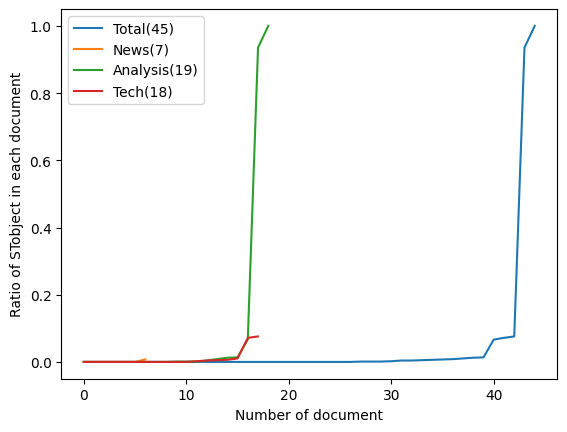

In [18]:
max = df['opN'].max()
min = df['opN'].min()

ioc_counts = df['opN']/max
ioc_counts = ioc_counts.sort_values()
ioc_counts = ioc_counts.to_list()

df_news = df[df['Genre'] == 'news']
df_analysis = df[df['Genre'] == 'analysis']
df_tech = df[df['Genre'] == 'tech']
# campaign 只有一篇 Kaiten-trendmicro

ioc_news_cnt = df_news['opN']/max
ioc_news_cnt = ioc_news_cnt.sort_values().to_list()

ioc_anal_cnt = df_analysis['opN']/max
ioc_anal_cnt = ioc_anal_cnt.sort_values().to_list()

ioc_tech_cnt = df_tech['opN']/max
ioc_tech_cnt = ioc_tech_cnt.sort_values().to_list()

plt.plot(ioc_counts, label=f'Total({len(ioc_counts)})')
plt.plot(ioc_news_cnt, label=f'News({len(ioc_news_cnt)})')
plt.plot(ioc_anal_cnt, label=f'Analysis({len(ioc_anal_cnt)})')
plt.plot(ioc_tech_cnt, label=f'Tech({len(ioc_tech_cnt)})')
plt.ylabel("Ratio of STobject in each document") # y label
plt.xlabel("Number of document") # x label
plt.legend() # Add legend